In [1]:
%load_ext autoreload
%matplotlib inline

# Checking new datasets (BEAM, BUNCH, CONTROLLER, and STATE)

Pieter on 23/03
> Verder realiseerde ik mij dat sommige anomalieën inderdaad de hieronder vermelde features gaan nodig hebben (softstartstate, control, mode, KiTS (Kicker Timing System) variabelen KICK_xxx) om detecteerbaar te zijn, wat misschien de lage precisie & recall van de huidige modellen kan verklaren.

> Wanneer ik door de e-logbook entries ging zag ik dat bepaalde evenementen met de tags (fault, anomaly) enkel detecteer zijn door middel van de 'MODE' variabele. Inzake de KICK_xxx variabelen, dit zijn de configuratiewaarden van het Kicker Timing System (KiTS). De waarden die constant zijn kan je negeren (count_toplay, time_toplay) en wat verdere info:
enable: use this magnet or not (bool)
delay: delay between request and trigger
lengt: pulse length
strength: kick strength

softstartstate, control, en mode horen bij STATE

KICK_xxx metingen horen bij CONTROLLER

Zie data_info pdf voor meer info over CONTROLLER variabelen

In [2]:
import os, sys
import numpy as np
import pandas as pd
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('..')))

import util
import plot.data
from plot import pyplot as plt
from evaluation import evaluation
from database.CERNMongoClient import CERNMongoClient

# auto-load changes in imported modules
%autoreload 2

In [3]:
db = CERNMongoClient()

## BEAM_INTENSITY

In [7]:
beam_intensity = [(measurement, db.query(pattern), unit) for pattern, measurement, unit in util.MEASUREMENTS_BEAM_INTENSITY]

Fetching data for pattern ^LHC\.BCTFR\.A6R4.B(1|2):BEAM_INTENSITY$ from 2015-06-22 00:00:00 to 2016-09-14 00:00:00



In [6]:
beam_intensity[0][1].describe()

LHC.BCTFR.A6R4.B2:BEAM_INTENSITY  LHC.BCTFR.A6R4.B1:BEAM_INTENSITY
count                      3.626619e+07                      3.626619e+07
mean                       3.824957e+13                      3.791551e+13
std                        7.340966e+13                      7.312347e+13
min                        0.000000e+00                     -2.485282e+14
25%                        0.000000e+00                      0.000000e+00
50%                        0.000000e+00                      0.000000e+00
75%                        1.801889e+13                      1.638410e+13
max                        2.813402e+14                      2.824189e+14

In [26]:
beam_intensity[0][1].describe()

LHC.BCTFR.A6R4.B2:BEAM_INTENSITY  LHC.BCTFR.A6R4.B1:BEAM_INTENSITY
count                      1.269717e+07                      1.269717e+07
mean                       7.908640e+13                      7.842397e+13
std                        9.478326e+13                      9.400623e+13
min                        0.000000e+00                      0.000000e+00
25%                        0.000000e+00                      0.000000e+00
50%                        1.046710e+12                      4.713000e+11
75%                        1.821815e+14                      1.795484e+14
max                        2.678995e+14                      2.669613e+14

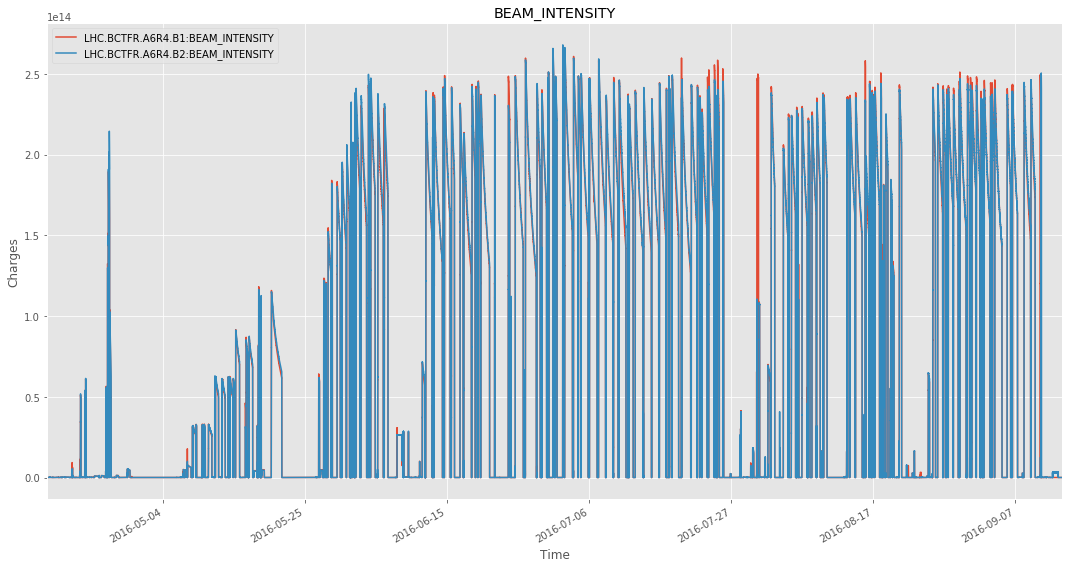

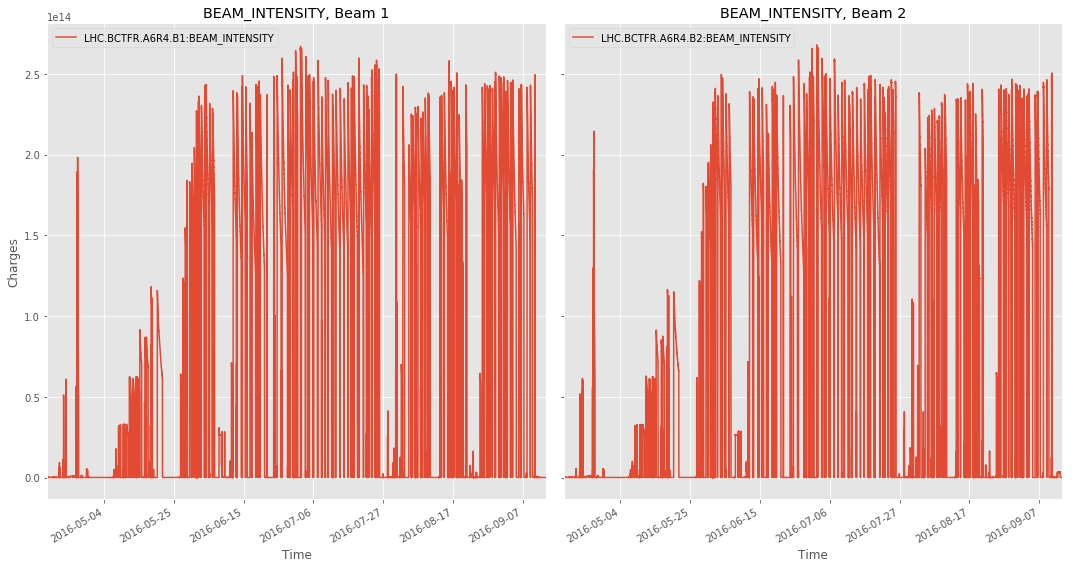

In [18]:
for measurement, data, unit in beam_intensity:
    plot.data.continuous(data, measurement, unit)
    plot.data.continuous_beams(data, measurement, unit)

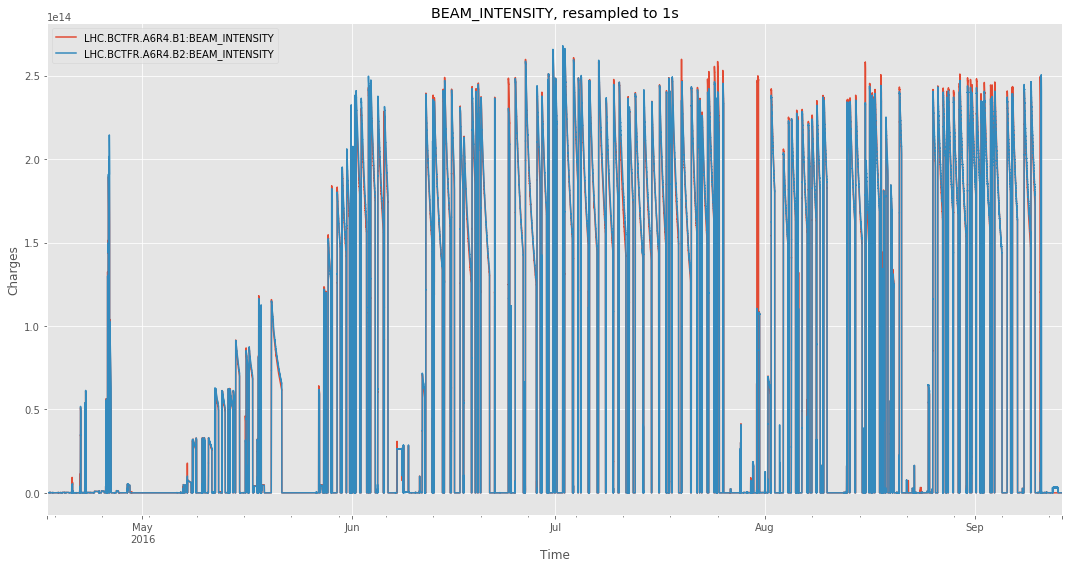

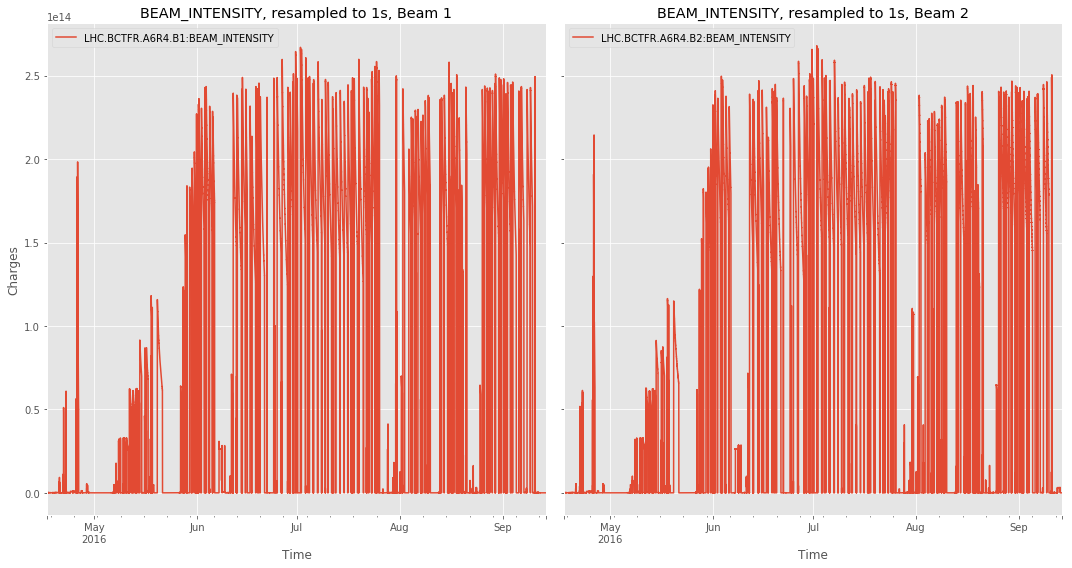

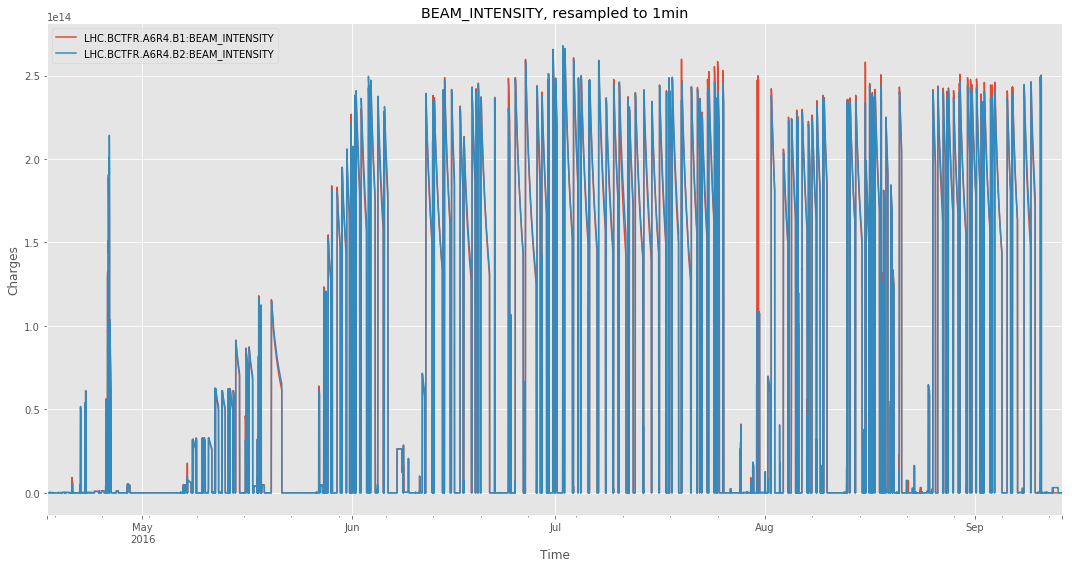

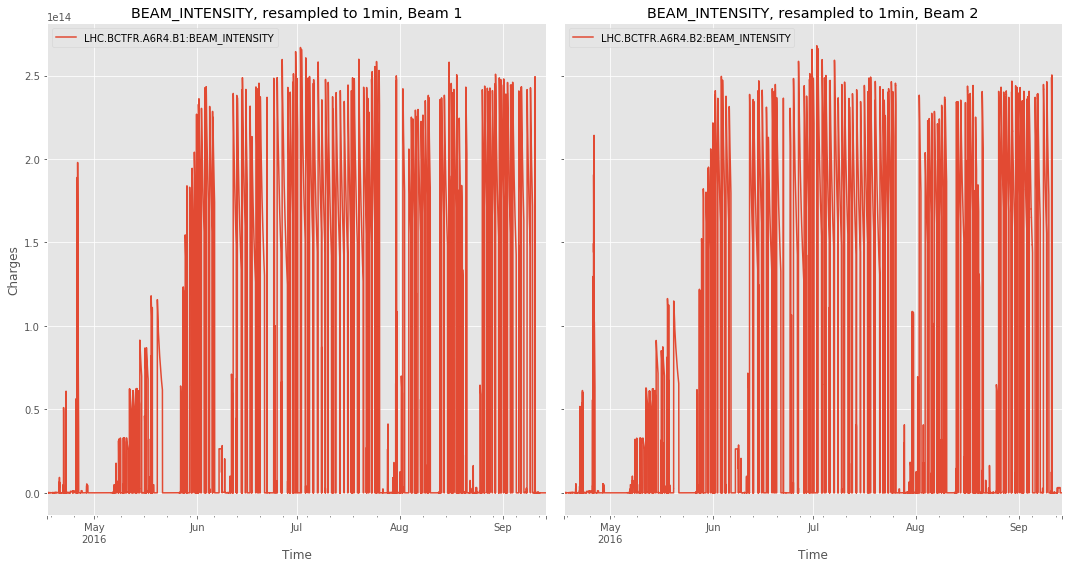

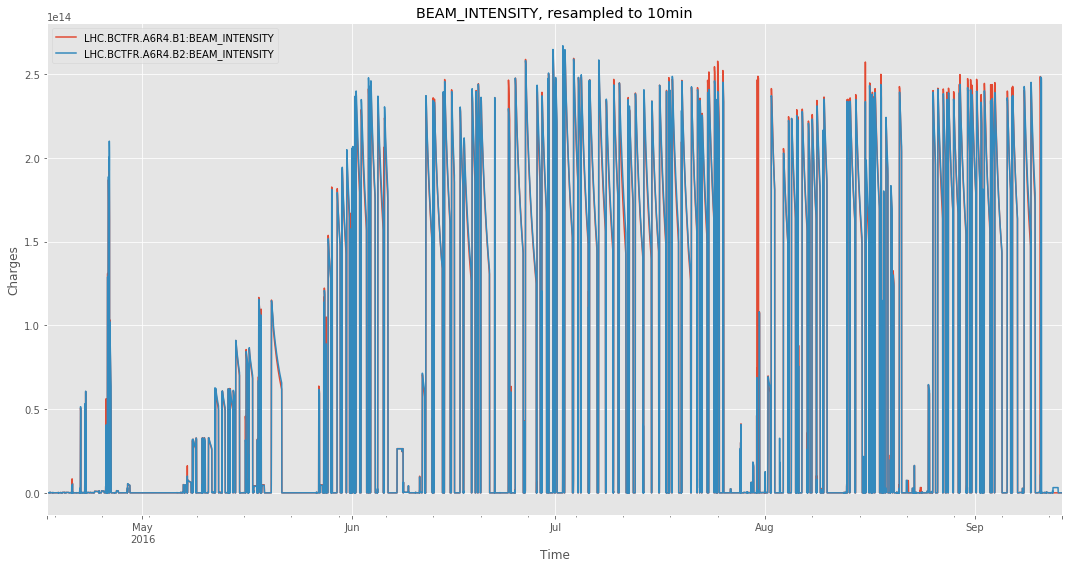

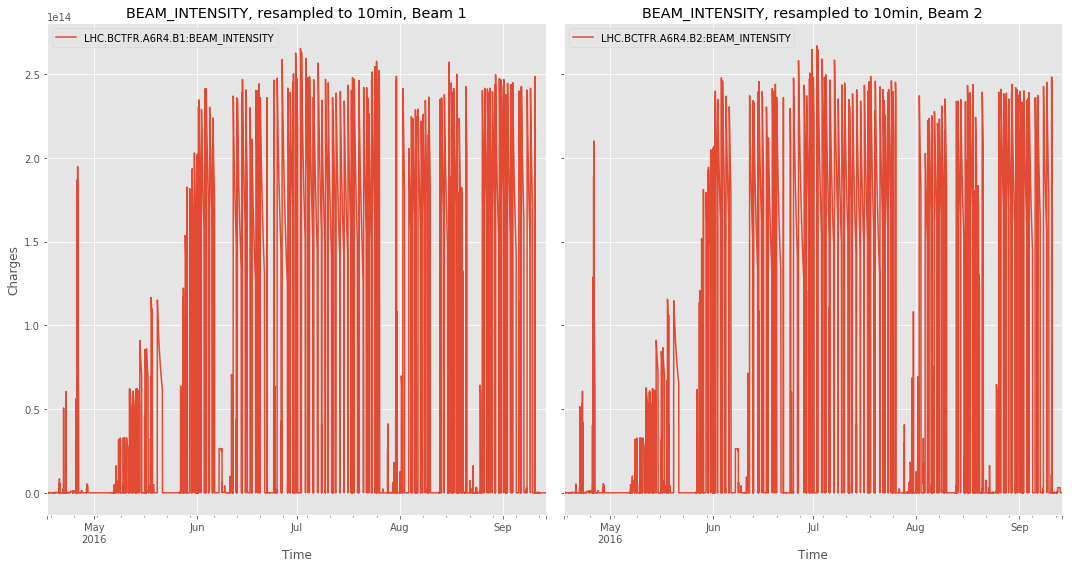

In [19]:
for measurement, data, unit in beam_intensity:
    df = data.resample("1s").mean().fillna(method='ffill').fillna(method='backfill')
    plot.data.continuous(df, measurement + ", resampled to 1s", unit)
    plot.data.continuous_beams(df, measurement + ", resampled to 1s", unit)
    
    df = data.resample("1min").mean().fillna(method='ffill').fillna(method='backfill')
    plot.data.continuous(df, measurement + ", resampled to 1min", unit)
    plot.data.continuous_beams(df, measurement + ", resampled to 1min", unit)
    
    df = data.resample("10min").mean().fillna(method='ffill').fillna(method='backfill')
    plot.data.continuous(df, measurement + ", resampled to 10min", unit)
    plot.data.continuous_beams(df, measurement + ", resampled to 10min", unit)

### Zoom in on section in june

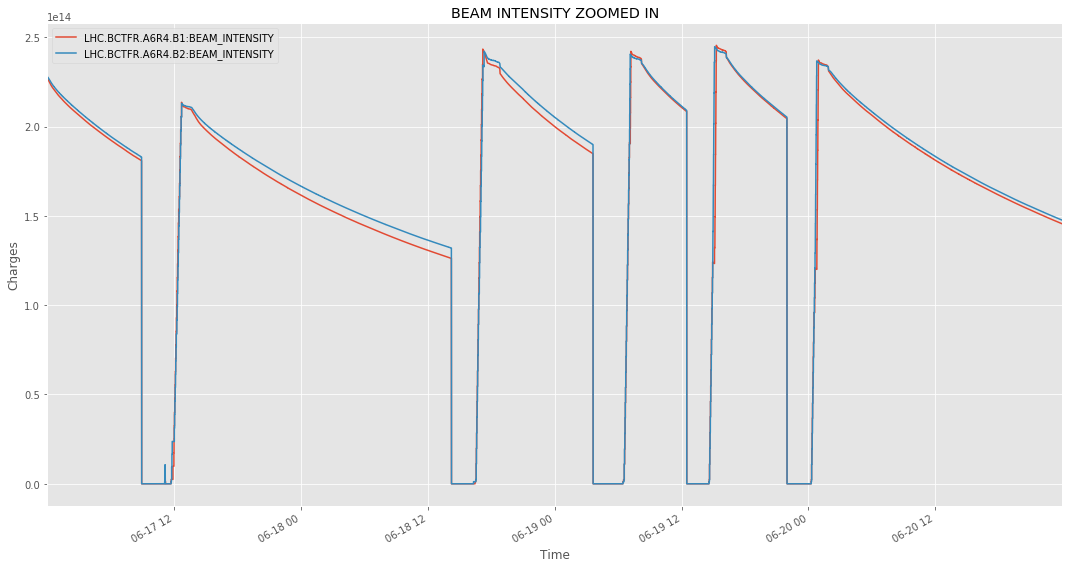

In [65]:
plot.data.continuous(beam_intensity[0][1]["2016-06-17":"2016-06-20"], "BEAM INTENSITY ZOOMED IN", "Charges")

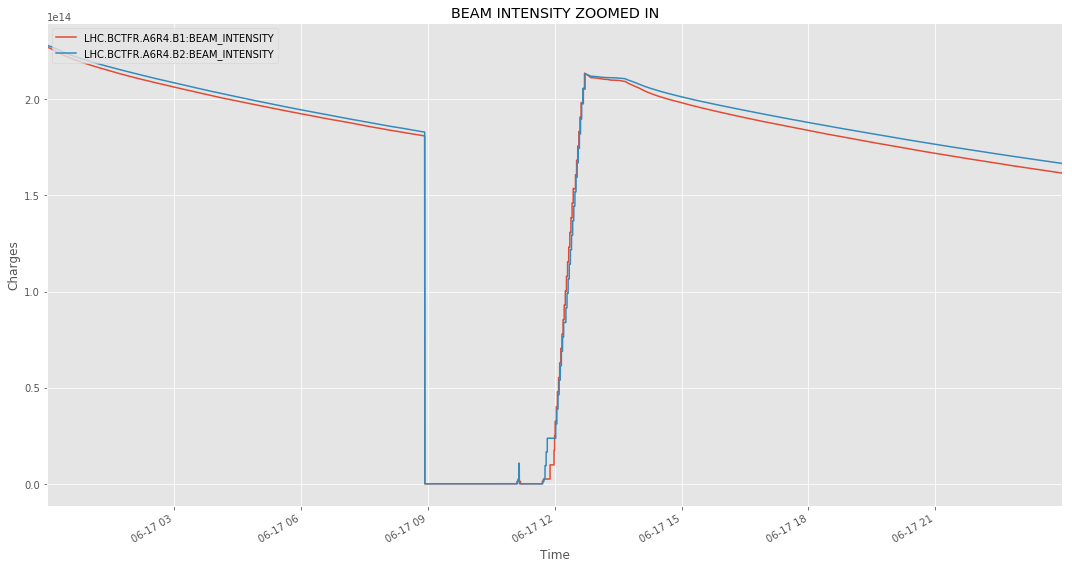

In [76]:
plot.data.continuous(beam_intensity[0][1]["2016-06-17":"2016-06-17"], "BEAM INTENSITY ZOOMED IN", "Charges")

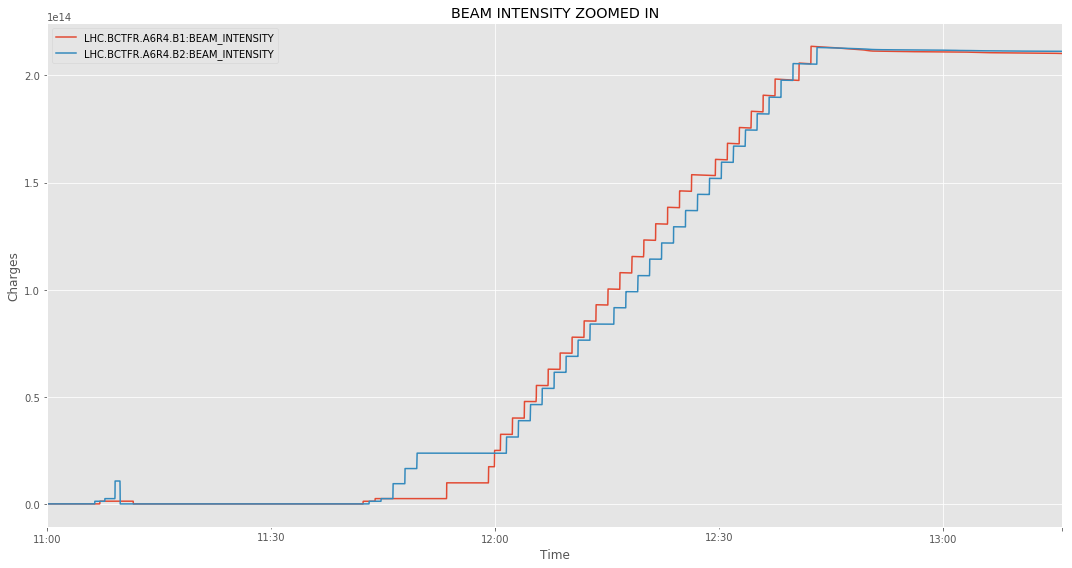

In [79]:
plot.data.continuous(beam_intensity[0][1]["2016-06-17 11:00":"2016-06-17 13:15"].resample('1s').mean().interpolate(), "BEAM INTENSITY ZOOMED IN", "Charges")

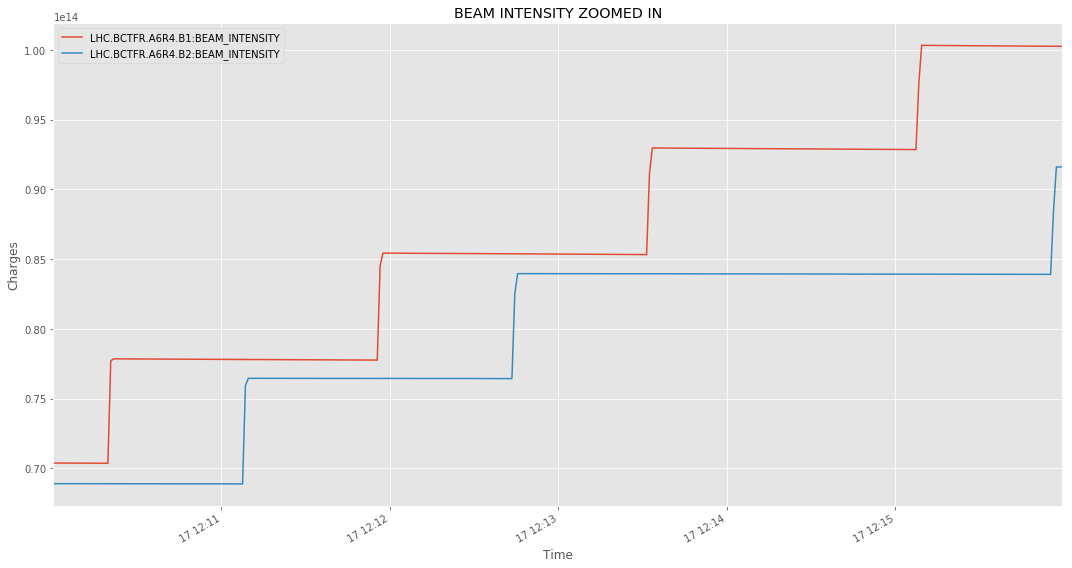

In [80]:
plot.data.continuous(beam_intensity[0][1]["2016-06-17 12:10":"2016-06-17 12:15"], "BEAM INTENSITY ZOOMED IN", "Charges")

### Zoom in on other area

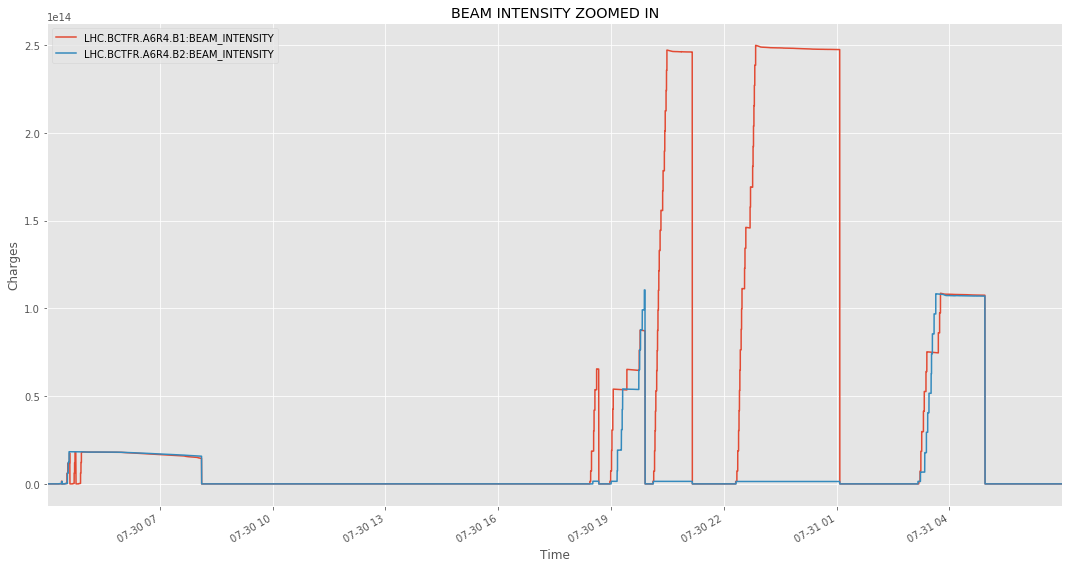

In [83]:
plot.data.continuous(beam_intensity[0][1]["2016-07-30 04":"2016-07-31 06"], "BEAM INTENSITY ZOOMED IN", "Charges")

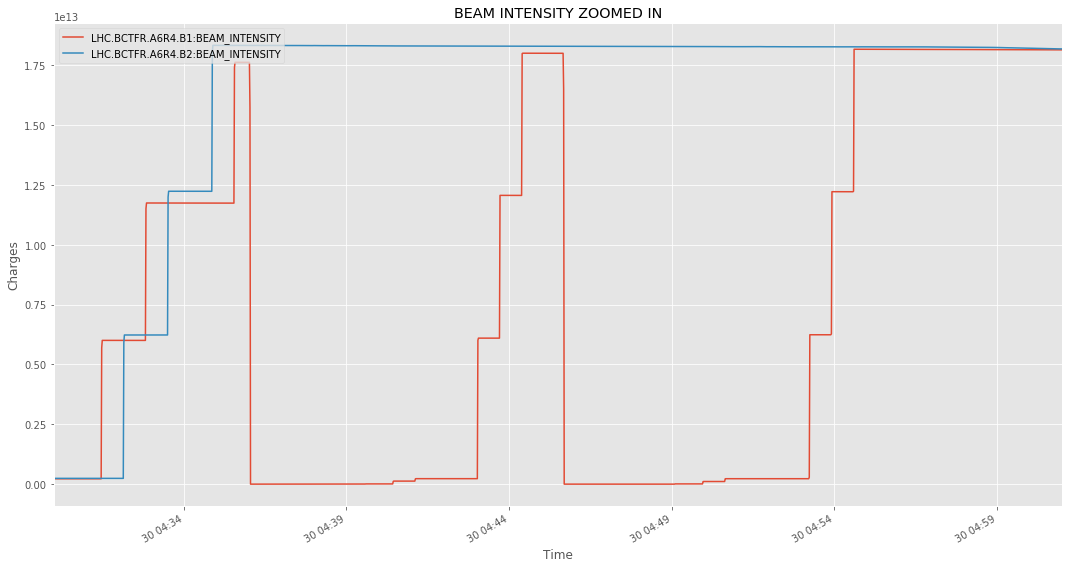

In [87]:
plot.data.continuous(beam_intensity[0][1]["2016-07-30 04:30":"2016-07-30 05:00"], "BEAM INTENSITY ZOOMED IN", "Charges")

## BUNCH_LENGTH_MEAN

In [21]:
bunch_length_mean = [(measurement, db.query(pattern), unit) for pattern, measurement, unit in util.MEASUREMENTS_BUNCH_LENGTH_MEAN]

Fetching data for pattern ^LHC\.BQM\.B(1|2):BUNCH_LENGTH_MEAN$ from 2016-04-16 00:00:00 to 2016-09-14 00:00:00
Fetching data for LHC.BQM.B2:BUNCH_LENGTH_MEAN
Fetching data for LHC.BQM.B1:BUNCH_LENGTH_MEAN



In [28]:
bunch_length_mean[0][1].describe()

LHC.BQM.B2:BUNCH_LENGTH_MEAN  LHC.BQM.B1:BUNCH_LENGTH_MEAN
count                  1.327069e+06                  1.327069e+06
mean                   9.846392e-10                  9.896148e-10
std                    2.749804e-10                  2.636691e-10
min                    0.000000e+00                  0.000000e+00
25%                    8.700000e-10                  8.700000e-10
50%                    1.060000e-09                  1.060000e-09
75%                    1.170000e-09                  1.170000e-09
max                    7.440000e-09                  2.020000e-09

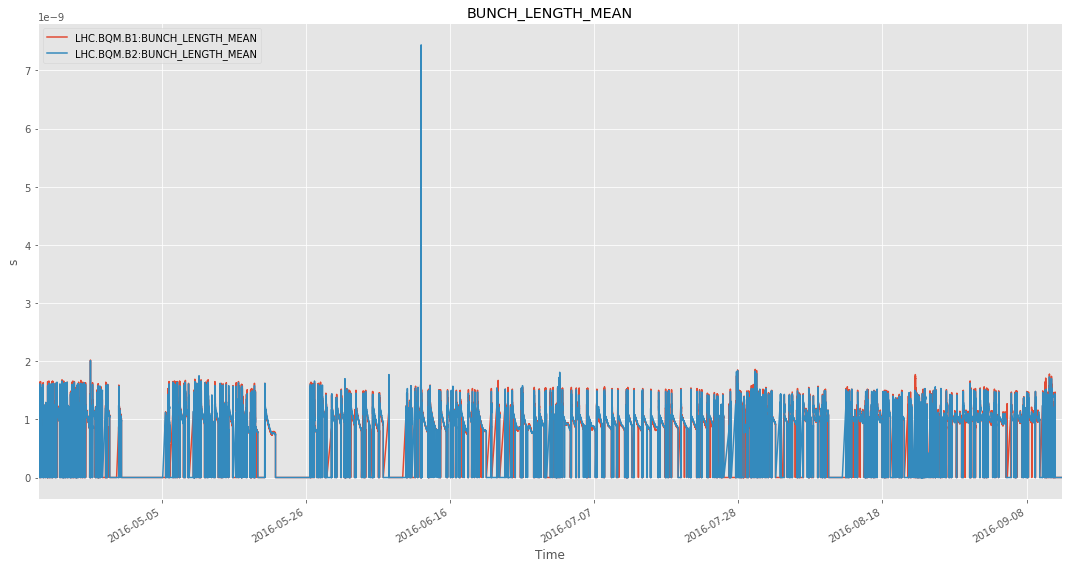

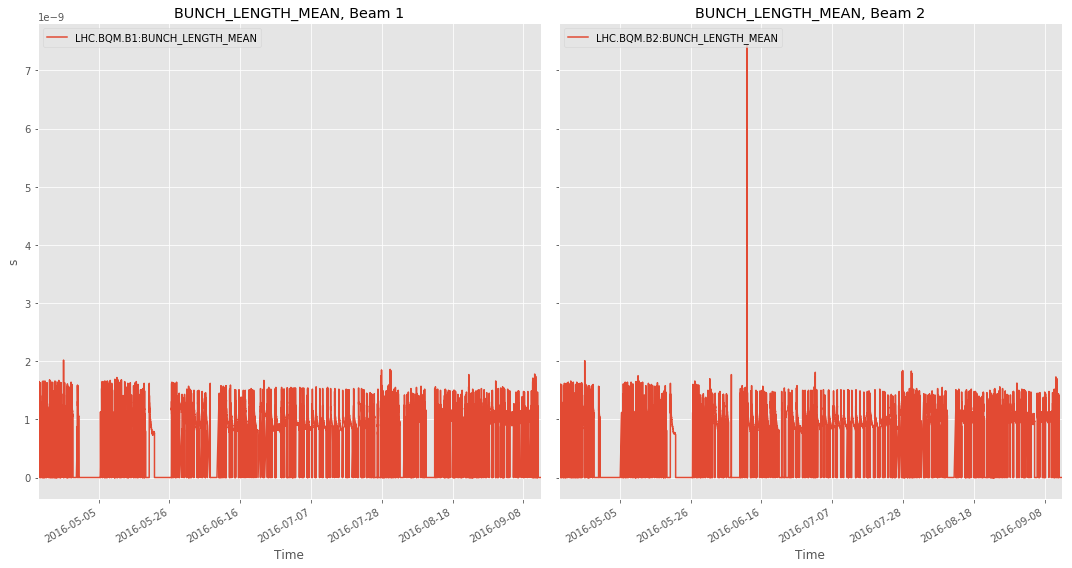

In [32]:
for measurement, data, unit in bunch_length_mean:
    plot.data.continuous(data, measurement, unit)
    plot.data.continuous_beams(data, measurement, unit)

In [39]:
bunch_length_mean[0][1][(bunch_length_mean[0][1] > 3e-9).any(axis=1)]

LHC.BQM.B2:BUNCH_LENGTH_MEAN  \
2016-06-11 19:13:50.624                  7.440000e-09   

                         LHC.BQM.B1:BUNCH_LENGTH_MEAN  
2016-06-11 19:13:50.624                           0.0

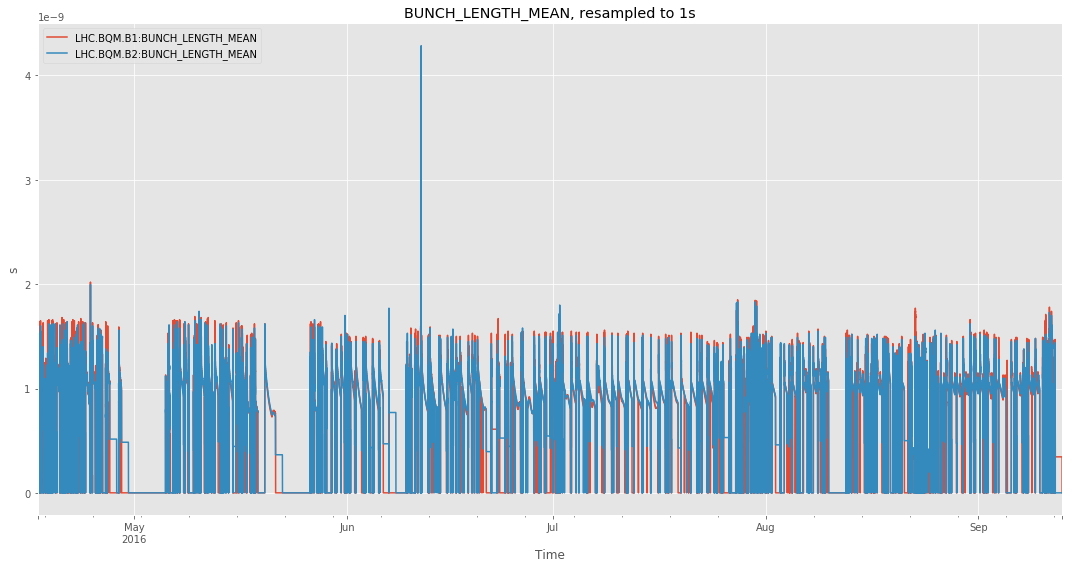

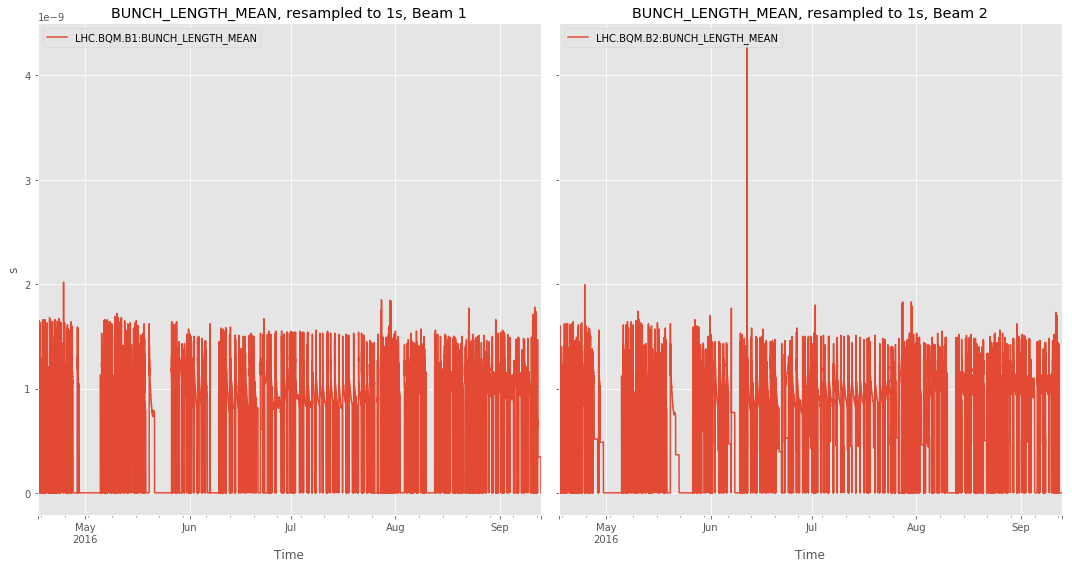

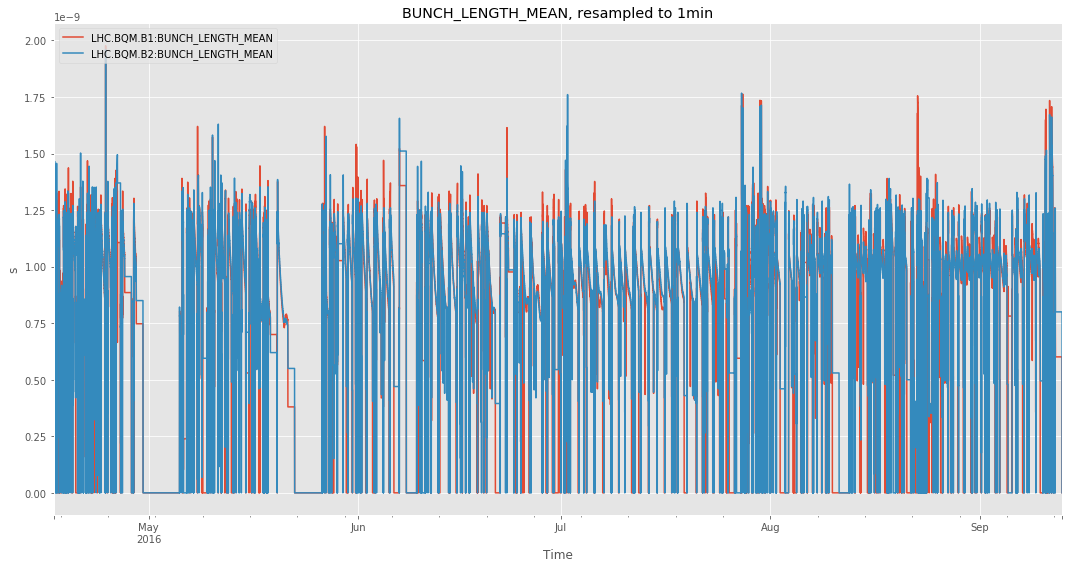

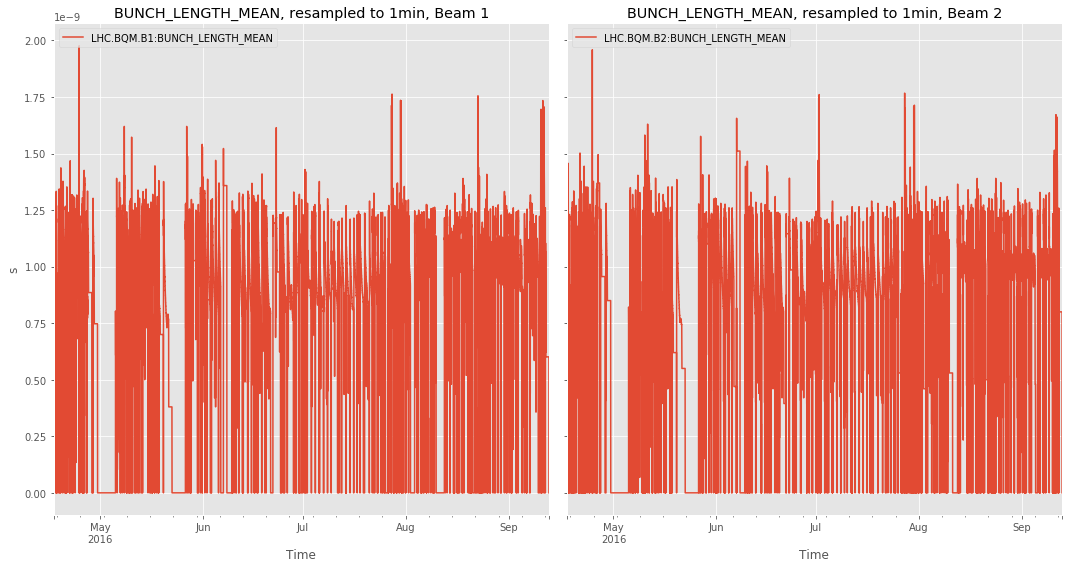

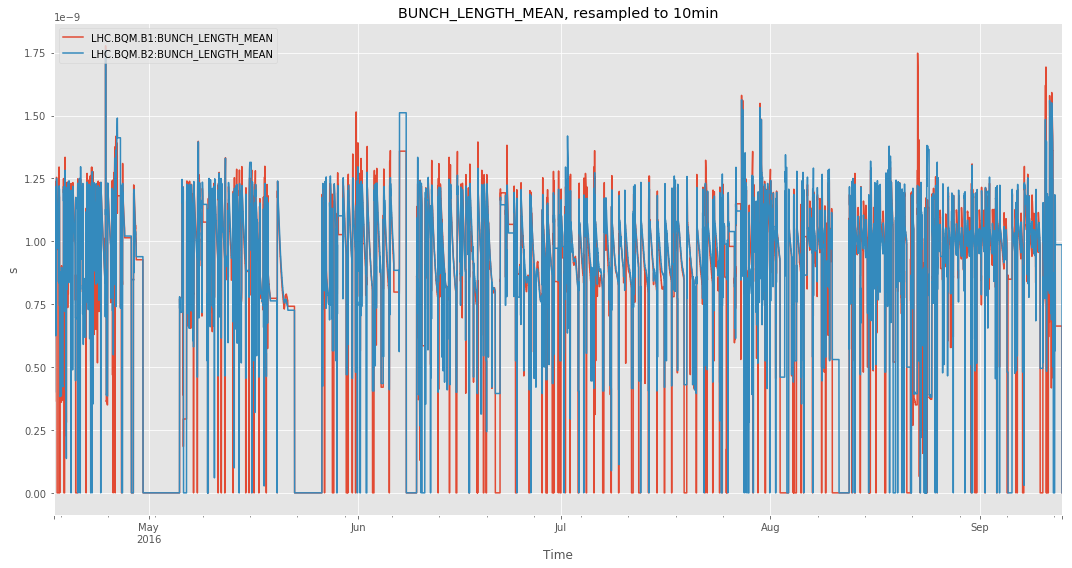

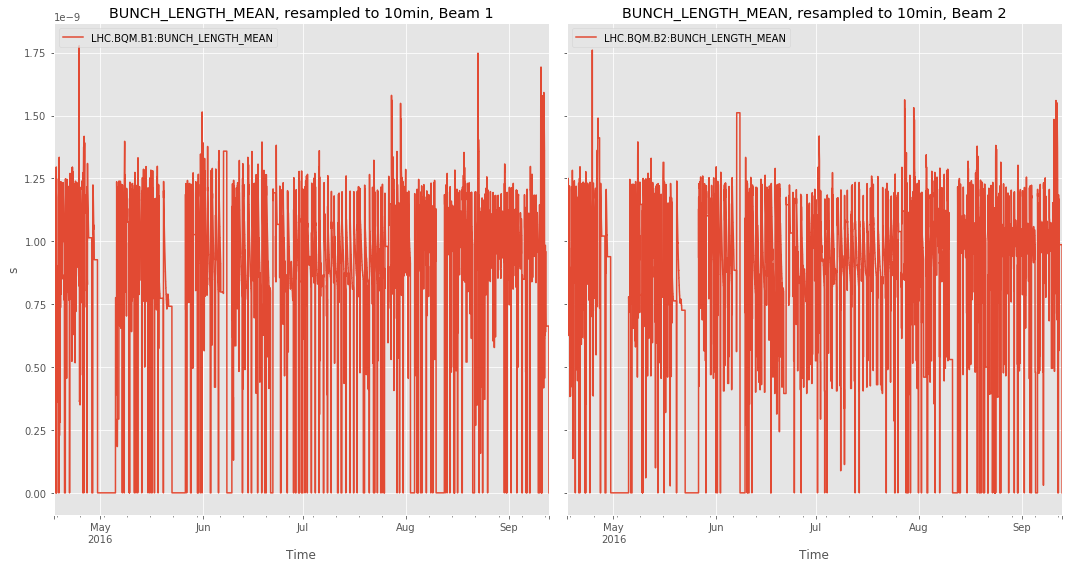

In [33]:
for measurement, data, unit in bunch_length_mean:
    df = data.resample("1s").mean().fillna(method='ffill').fillna(method='backfill')
    plot.data.continuous(df, measurement + ", resampled to 1s", unit)
    plot.data.continuous_beams(df, measurement + ", resampled to 1s", unit)
    
    df = data.resample("1min").mean().fillna(method='ffill').fillna(method='backfill')
    plot.data.continuous(df, measurement + ", resampled to 1min", unit)
    plot.data.continuous_beams(df, measurement + ", resampled to 1min", unit)
    
    df = data.resample("10min").mean().fillna(method='ffill').fillna(method='backfill')
    plot.data.continuous(df, measurement + ", resampled to 10min", unit)
    plot.data.continuous_beams(df, measurement + ", resampled to 10min", unit)

## STATE


In [28]:
data_state = [(measurement, db.query(pattern), unit) for pattern, measurement, unit in util.MEASUREMENTS_STATE]

Fetching data for pattern .*CONTROLLER:KICK_COUNT_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_COUNT_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_COUNT_TOPLAY
Fetching data for pattern .*CONTROLLER:KICK_DELAY_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_DELAY_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_DELAY_TOPLAY
Fetching data for pattern .*CONTROLLER:KICK_ENABLE_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_ENABLE_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_ENABLE_TOPLAY
Fetching data for pattern .*CONTROLLER:KICK_LENGTH_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_LENGTH_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_LENGTH_TOPLAY
Fetching data for pattern .*CONTROLLER:KIC

The STATE data is stored as strings, need to convert first

'7'

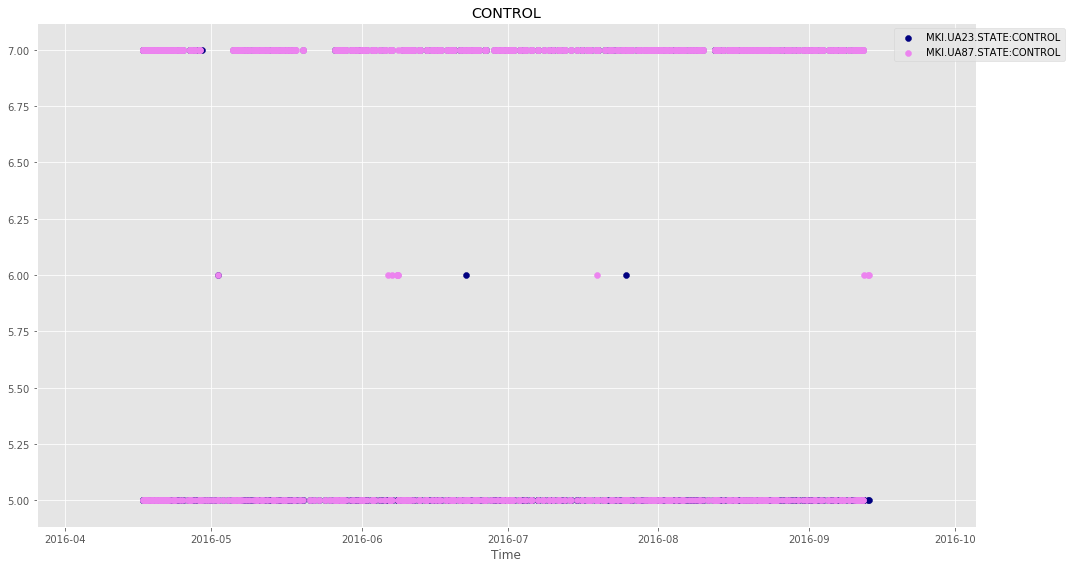

'1'

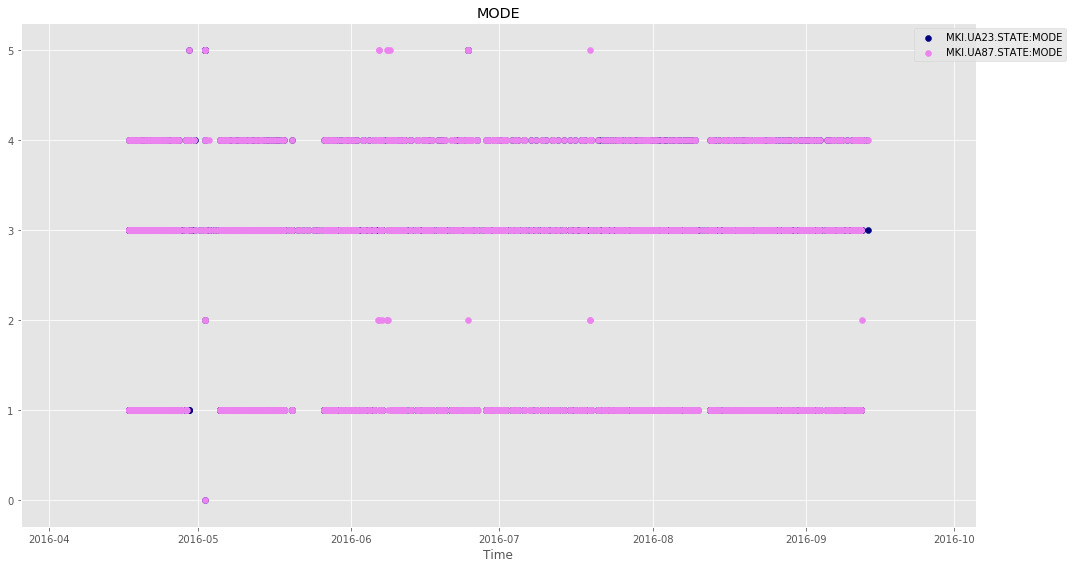

'0'

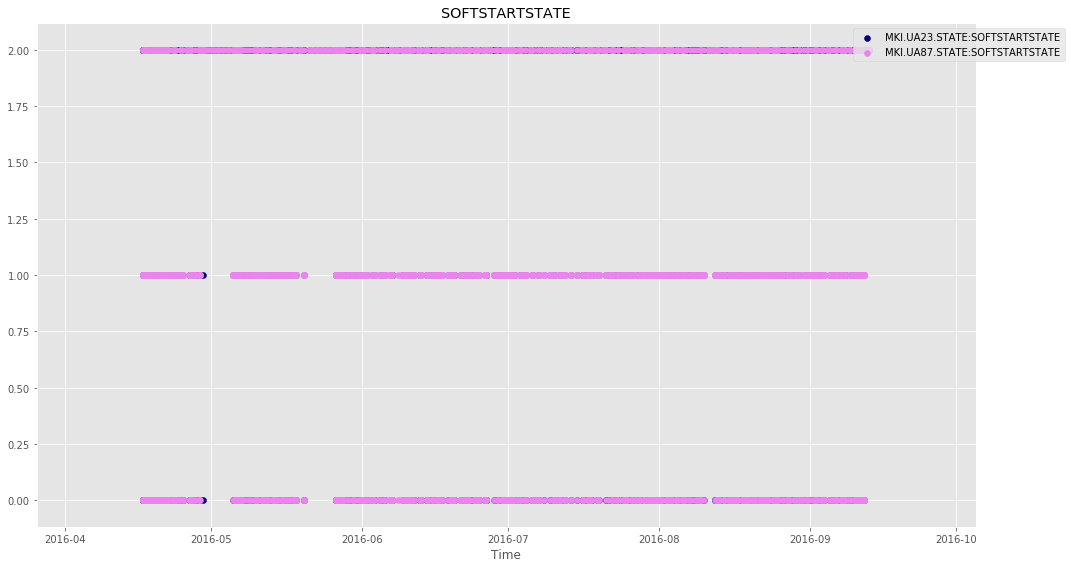

'1'

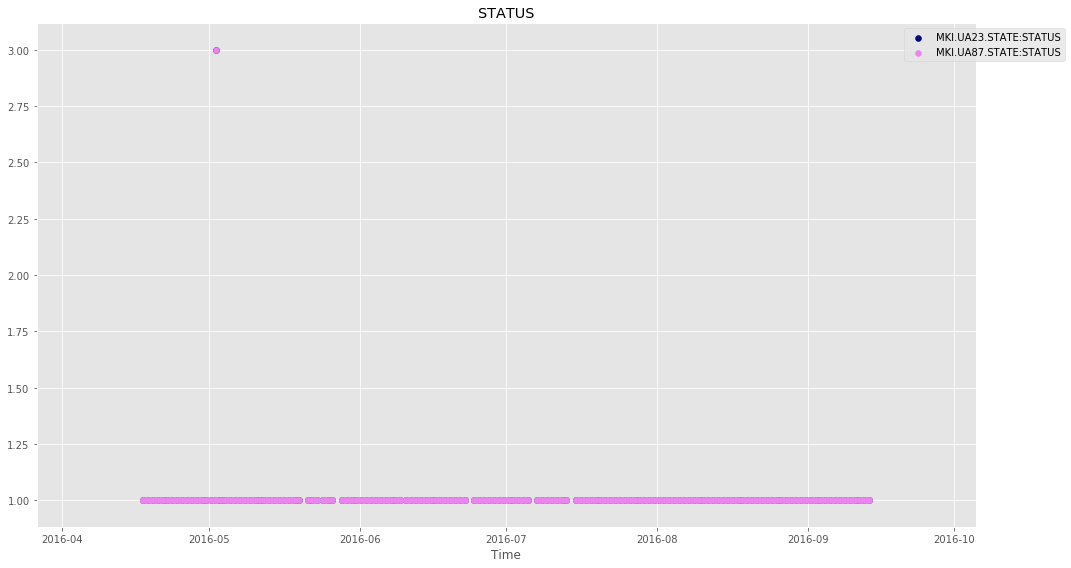

In [37]:
for m, df in data_state:
    display(df.iloc[0][0])
    for c in df:
        df[c] = df[c].astype(float)
    plot.data.ipoc(df, m, "")

## CONTROLLER

In [28]:
data_controller = [(measurement, db.query(pattern)) for pattern, measurement, unit in util.MEASUREMENTS_CONTROLLER]

Fetching data for pattern .*CONTROLLER:KICK_COUNT_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_COUNT_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_COUNT_TOPLAY
Fetching data for pattern .*CONTROLLER:KICK_DELAY_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_DELAY_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_DELAY_TOPLAY
Fetching data for pattern .*CONTROLLER:KICK_ENABLE_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_ENABLE_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_ENABLE_TOPLAY
Fetching data for pattern .*CONTROLLER:KICK_LENGTH_TOPLAY$ from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.UA87.F3.CONTROLLER:KICK_LENGTH_TOPLAY
Fetching data for MKI.UA23.F3.CONTROLLER:KICK_LENGTH_TOPLAY
Fetching data for pattern .*CONTROLLER:KIC

Some CONTROLLER data is stored in lists. Need to figure out what to do with that.

numpy.float64

numpy.float64

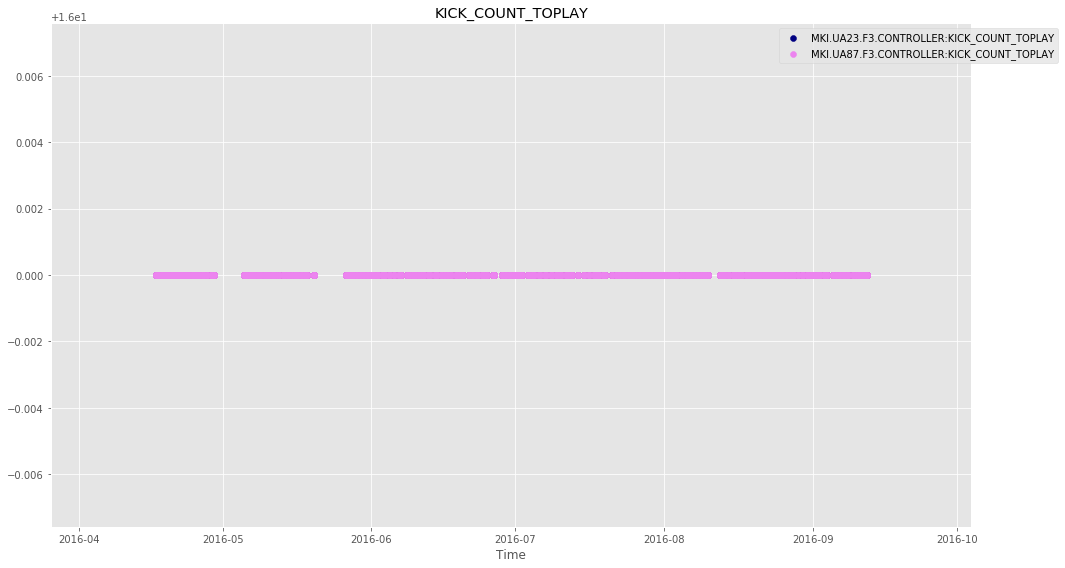

numpy.float64

numpy.float64

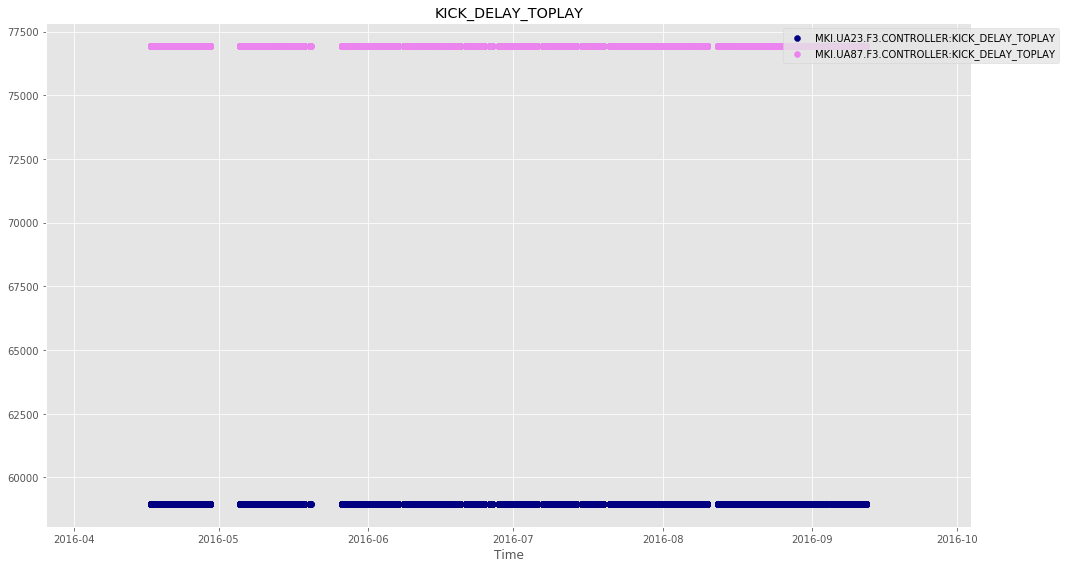

list

numpy.float64

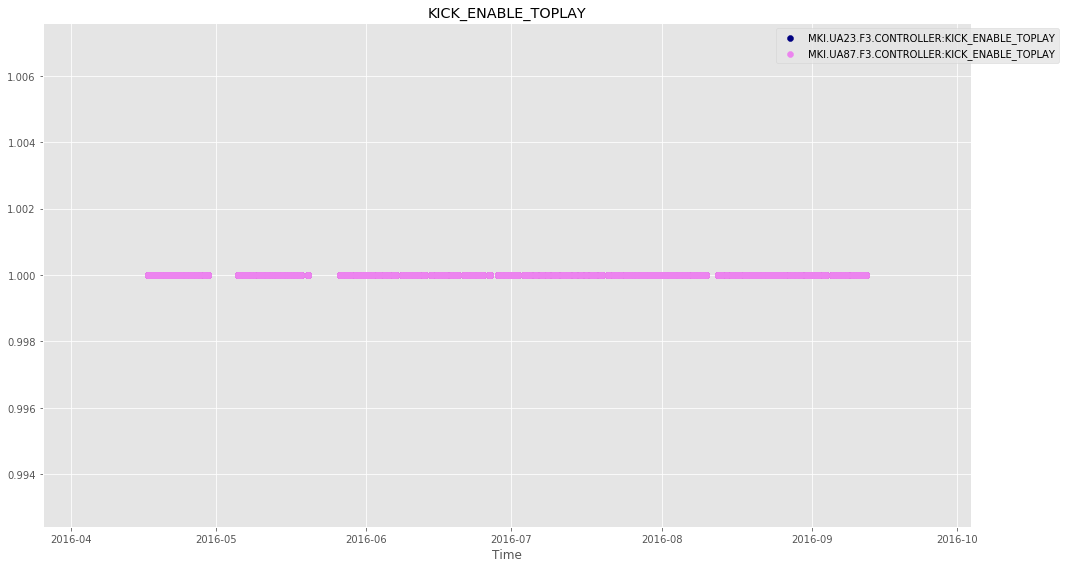

list

numpy.float64

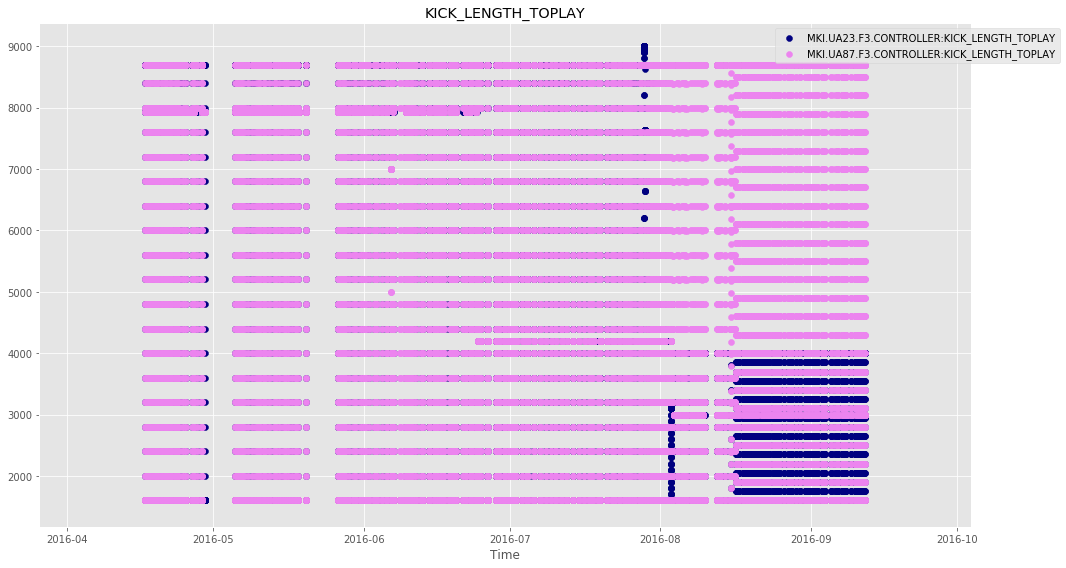

list

numpy.float64

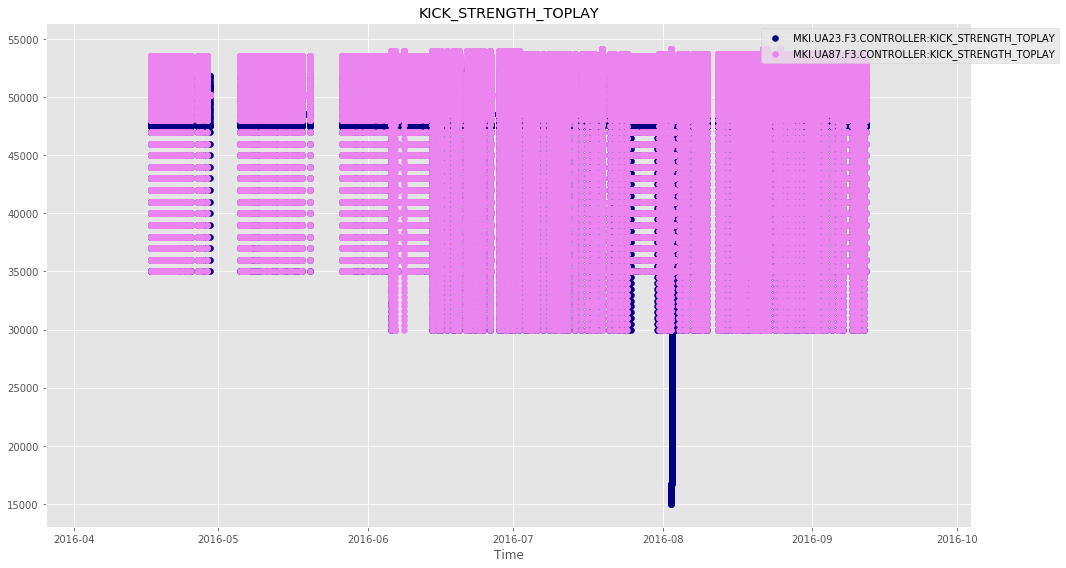

list

numpy.float64

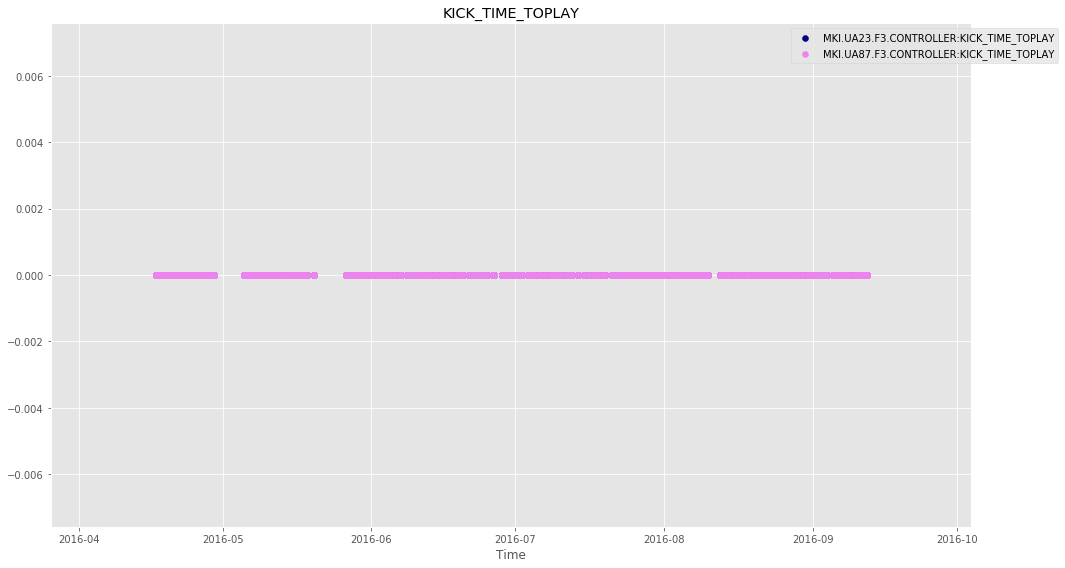

In [69]:
for m, df in data_controller:
    display(type(df.iloc[0][0]))
    df = df.applymap(lambda x: x[0] if type(x) is list else x)
    display(type(df.iloc[0][0]))
    plot.data.ipoc(df, m, "")

### Zoom in on some controller data

In [43]:
df_kick_count_toplay = data_controller[0][1]
df_kick_count_toplay.head()

MKI.UA87.F3.CONTROLLER:KICK_COUNT_TOPLAY  \
2016-04-17 00:50:28.902                                      16.0   
2016-04-17 00:50:38.902                                      16.0   
2016-04-17 00:50:39.458                                      16.0   
2016-04-17 00:50:48.902                                      16.0   
2016-04-17 00:50:49.458                                      16.0   

                         MKI.UA23.F3.CONTROLLER:KICK_COUNT_TOPLAY  
2016-04-17 00:50:28.902                                      16.0  
2016-04-17 00:50:38.902                                      16.0  
2016-04-17 00:50:39.458                                      16.0  
2016-04-17 00:50:48.902                                      16.0  
2016-04-17 00:50:49.458                                      16.0

In [ ]:
plot.data.ipoc(df_kick_count_toplay.iloc[17000:17500], "KICK_COUNT_TOPLAY", "?")